# What is classification problem?

A classification is a problem that predicts whether something is one thing or another. For example:

| Problem type                   | What is it                                        | Example                                                    |
|--------------------------------|---------------------------------------------------|------------------------------------------------------------|
| **Binary classification**      | Target can be *one of two* options                | Predict whether a picture is a cat or dog                  |
| **Multi-class classification** | Target can be *one of **more*** than two options  | Decide whether a photo is of food, a person or a dog       |
| **Multi-label classification** | Target can be *assigned **more than one*** option | Predict what categories should be assigned to an article   |

![classifacation problems](./docs/images/02-pytorch-nueral-network-classification/02-different-classification-problems.png "classification problems")

# Architecture of a classification network

| Hyperparameter                    | Binary Classification                                                                                        | Multiclass classification                            |
|-----------------------------------|--------------------------------------------------------------------------------------------------------------|------------------------------------------------------|
| Input layer shape (in_features)   | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification                        |
| Hidden layer(s)                   | Problem specific, minimum = 1, maximum = unlimited                                                           | Same as binary classification                        |
| Neurons per hidden layer          | Problem specific, generally 10 to 512                                                                        | Same as binary classification                        |
| Output layer shape (out_features) | 1 (one class or the other)                                                                                   | 1 per class (e.g. 3 for food, person or dog photo)   |
| Hidden layer activation           | Usually ReLU (rectified linear unit) but can be many others                                                  | Same as binary classification                        |
| Output activation                 | Sigmoid (torch.sigmoid in PyTorch)                                                                           | Softmax (torch.softmax in PyTorch)                   |
| Loss function                     | Binary crossentropy (torch.nn.BCELoss in PyTorch)                                                            | Cross entropy (torch.nn.CrossEntropyLoss in PyTorch) |
| Optimizer                         | SGD (stochastic gradient descent), Adam (see torch.optim for more options)                                   | Same as binary classification                        |

# Make classification data

We'll use `make_circle()` from Scikit-Learn to generate two circles with different coloured dots

In [1]:
# 1. Make some data and get it ready
import sklearn
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000
random_seed = 42

# Create circle
X, y = make_circles(n_samples=n_samples, 
                    noise=0.03,
                    random_state=random_seed)

In [2]:
len(X), len(y)

(1000, 1000)

In [3]:
print(f'First 5 samples of X: \n{X[:5]}')
print(f'\nFirst 5 samples of y: \n{y[:5]}')

First 5 samples of X: 
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 samples of y: 
[1 1 1 1 0]


In [4]:
# Make dataframe of circle data
import pandas as pd
circle = pd.DataFrame(
    data={
    "X1": X[:,0],   # Feature 1
    "X2": X[:,1],    # Feature 2
    "label": y}
)
circle.head(10)     # show first 10 samples

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


From the table, it looks like each pair of `X` features (`X1` and `X2`) has a label `y` value of either `0` or `1`. Let's visualize the data by using `mathplotlib` 

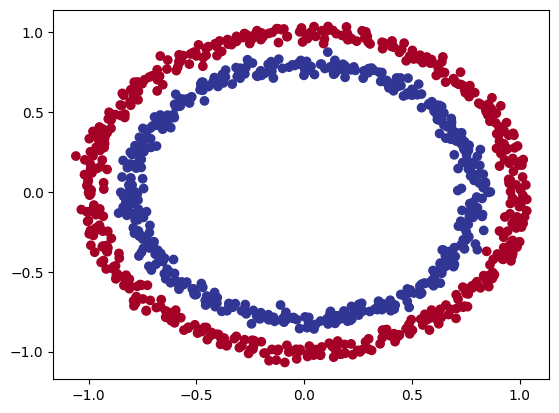

In [5]:
# Visualize data
import matplotlib.pyplot as plt

X1 = X[:,0]
X2 = X[:,1]

plt.scatter(
    x=X1,
    y=X2,
    c=y,
    cmap=plt.cm.RdYlBu
);

From the data, our problem is how we could build a PyTorch neural network to classify dots into `red (0)` or `blue (1)`

## 1. Check input and output shapes

In [6]:
X.shape, X1.shape, X2.shape,y.shape

((1000, 2), (1000,), (1000,), (1000,))

In [7]:
# View an example of features and label
X_sample = X[0]
y_sample = y[0]

print(f'Values of one sample of X: {X_sample} and it\'s corresponding value of y: {y_sample}')
print(f'Shape of one sample of X: {X_sample.shape} and shape  of y: {y_sample.shape}')

Values of one sample of X: [0.75424625 0.23148074] and it's corresponding value of y: 1
Shape of one sample of X: (2,) and shape  of y: ()


## 2. Turn data into tensors and create train and test splits

In [8]:
import torch
print(torch.__version__)

# Check datatype of X and Y
print(f'Type of X: {type(X)}, type of y:{type(y)}')
print(f'Datatype of X: {X.dtype}, datatype of y:{y.dtype}')

2.5.1+cu124
Type of X: <class 'numpy.ndarray'>, type of y:<class 'numpy.ndarray'>
Datatype of X: float64, datatype of y:int64


In [9]:
# Converse data to tensor and dtype of float
X = torch.from_numpy(X).type(torch.float)

y = torch.from_numpy(y).type(torch.float)

# Check datatype of X and Y
print(f'Type of X: {type(X)}, type of y:{type(y)}')
print(f'Datatype of X: {X.dtype}, datatype of y:{y.dtype}')

Type of X: <class 'torch.Tensor'>, type of y:<class 'torch.Tensor'>
Datatype of X: torch.float32, datatype of y:torch.float32


In [10]:
# setup torch manual seed
torch.manual_seed(random_seed)

# Split data to training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.2,
    train_size=0.8,
    random_state=random_seed,
    shuffle=True,
)

print(f'Length of train set: X_train: {len(X_train)}\ty_train: {len(y_train)}')
print(f'Length of test set: X_test: {len(X_test)}\ty_test: {len(y_test)}')

Length of train set: X_train: 800	y_train: 800
Length of test set: X_test: 200	y_test: 200


## 3. Build a model

List of to do before training:
1. Setup device agnostic code
2. Construct a model
3. Define a `loss function` and `optimizer`
4. Create a training and test loop

### 3.1. Setup device agnostic code

In [11]:
import torch
from torch import  nn

# 3.1. Make device agnostics code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [12]:
# Move data to available device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

X_train.device

device(type='cuda', index=0)

### 3.2. Define a model

We'll want a model capable of handling our **X data** as inputs and producing something in the shape of our **y data** as outputs. In other words, given `X (features)` we want our model to predict `y (label)`.

Let's create a model class that:
1. Subclasses `nn.Module` (almost all PyTorch models are subclasses of nn.Module).
2. Creates **2** `nn.Linear` layers in the constructor capable of handling the input and output shapes of `X` and `y`.
3. Defines a `forward()` method containing the forward pass computation of the model.
4. Instantiates the model class and sends it to the target `device`.

In [13]:
# 1. Construct a model
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.linear layers capable of handling the shape of the data
        self.layer_1 = nn.Linear(
            in_features=2,
            out_features=5,
        )   # take in 2 features and upscale to 5 features
        self.layer_2 = nn.Linear(
            in_features=5,
            out_features=1
        )   # take in 5 features from previous layer and output a single feature same shape of y
        
    # 3. Define forward function
    def forward(self, x):
        return self.layer_2(
            self.layer_1(x)
        )   # x -> layer_1 -> layer_2 -> output
        
# 4. Instantiate an instance of the above model class and send it to target device 
model_0 = CircleModelV0().to(device)
print(f'Model is in device: {next(model_0.parameters()).device}')
print(f'Model: {model_0}')

Model is in device: cuda:0
Model: CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)


In [14]:
# 5. Make predictions with untrained model
with torch.inference_mode():
    untrained_preds = model_0(X_test)
print(f'Length of predictions: {len(untrained_preds)}, shape: {untrained_preds.shape}')

print(f'First 10 predictions:\n {torch.round(untrained_preds[:10])}')
print(f'First 10 actual labels:\n {y_test[:10]}')

Length of predictions: 200, shape: torch.Size([200, 1])
First 10 predictions:
 tensor([[-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.]], device='cuda:0')
First 10 actual labels:
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0')


### 3.3. Define loss function and optimizer

Different problem types require different loss functions. For example, for a regression problem (predicting a number) you might use mean absolute error (MAE) loss.

And for a binary classification problem (like ours), you'll often use binary cross entropy as the loss function.

However, the same optimizer function can often be used across different problem spaces.

| Loss function/Optimizer                     | Problem type                             | PyTorch Code                                   |
|---------------------------------------------|------------------------------------------|------------------------------------------------|
| Stochastic Gradient Descent (SGD) optimizer | Classification, regression, many others. | torch.optim.SGD()                              |
| Adam Optimizer                              | Classification, regression, many others. | torch.optim.Adam()                             |
| Binary cross entropy loss	                  | Binary classification	                   | torch.nn.BCELossWithLogits or torch.nn.BCELoss |
| Cross entropy loss                          | Multi-class classification	              | torch.nn.CrossEntropyLoss                      | 
| Mean absolute error (MAE) or L1 Loss        | Regression                               | 	torch.nn.L1Loss                               |
| Mean squared error (MSE) or L2 Loss         | Regression                               | 	torch.nn.MSELoss                              |

In [15]:
# 3.3. Define loss function and optimizer
# loss_fn = nn.BCELoss()
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(
    params=model_0.parameters(),
    lr=0.1
)

In [16]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

###  3.4. Build a training and testing loop
To train our model, we are going to need to build a training loop
1. Forward pass
2. Calculate the loss
3. Optimize zero grads
4. Loss backward
5. Optimizer step

#### 3.4.1. From raw model outputs -> predicted labels (logits -> prediction probabilities -> prediction labels)
Our model outputs are going to be raw **logits**. We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification).
* **logits** are the raw outputs of our model without being passed to any activation function
* **prediction probabilities** are the values usually between `0` and `1` for how likely our model thinks it is a certain class

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.

In [17]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667]], device='cuda:0')

In [18]:
y_test[:5]

tensor([1., 0., 1., 0., 1.], device='cuda:0')

In [19]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4683],
        [0.4758],
        [0.4524],
        [0.4728],
        [0.4584]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them: 
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y)pred_probs` < 0.5, `y=0` (class 0)

In [20]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)
print(f'y_preds: {y_preds}')

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device)[:5])))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()



y_preds: tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')
tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0')

#### 3.4.2. Build a training and testing loop

In [21]:
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)

In [22]:
# set the number of epoch
epochs = 100

# put data to target device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [23]:
# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()
    
    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))  # logits -> pred probs -> pred labels
    
    # 2. Calculate accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss backward
    loss.backward()
    
    # 5. Optimizer step
    optimizer.step()
    
    
    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        # 2. Calculate the test loss
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
        
    # Print out what's happening
    if epoch % 10 == 0:
        print(f'Epoch {epoch}: Loss: {loss:.5f} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%')
        

Epoch 0: Loss: 0.69569 | Acc: 50.00% | Test loss: 0.69721 | Test acc: 50.00%
Epoch 10: Loss: 0.69403 | Acc: 50.00% | Test loss: 0.69615 | Test acc: 50.00%
Epoch 20: Loss: 0.69343 | Acc: 46.00% | Test loss: 0.69585 | Test acc: 48.50%
Epoch 30: Loss: 0.69321 | Acc: 49.00% | Test loss: 0.69577 | Test acc: 47.50%
Epoch 40: Loss: 0.69312 | Acc: 49.50% | Test loss: 0.69573 | Test acc: 46.50%
Epoch 50: Loss: 0.69308 | Acc: 50.38% | Test loss: 0.69569 | Test acc: 46.50%
Epoch 60: Loss: 0.69306 | Acc: 50.50% | Test loss: 0.69564 | Test acc: 46.50%
Epoch 70: Loss: 0.69305 | Acc: 50.50% | Test loss: 0.69559 | Test acc: 46.50%
Epoch 80: Loss: 0.69304 | Acc: 50.75% | Test loss: 0.69553 | Test acc: 46.50%
Epoch 90: Loss: 0.69303 | Acc: 50.38% | Test loss: 0.69547 | Test acc: 46.50%


## 4. Make predictions and evaluate the model
From the metrics it looks like our model is random guessing. Let's make a plot of our model's predictions, the data it's trying to predict on and the decision boundary it's creating for whether something is class 0 or class 1.

In [24]:
import requests
from pathlib import Path

# Download helper functions
if Path("helper/helper_functions.py").is_file():
    print('helper_functions.py is already exists')
else:
    print('Downloading functions.py')
    url = 'https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py'
    request = requests.get(url)
    with open('helper/helper_functions.py','wb') as file:
        file.write(request.content)
        
from helper.helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py is already exists


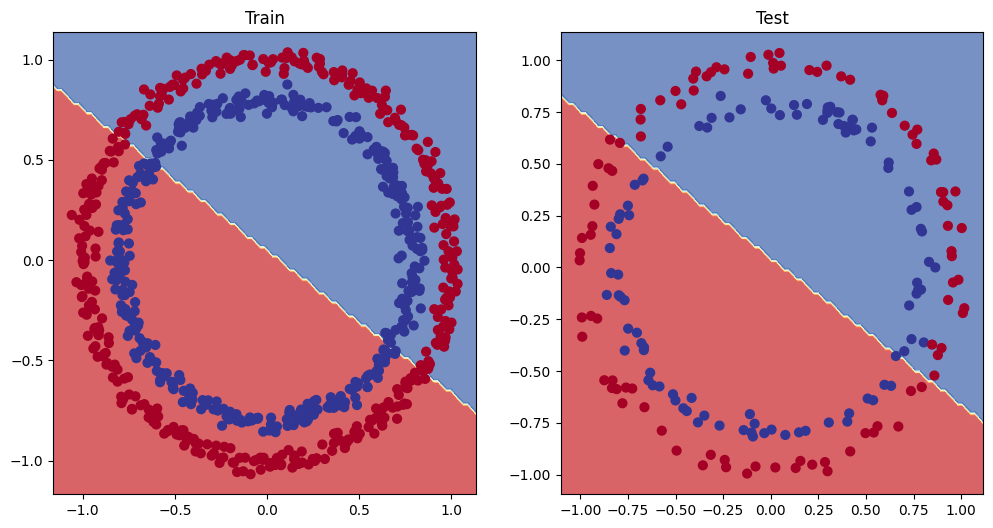

In [25]:
# plot decision boundaries for training and test sets
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_0,X_train,y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

It seems like we've found the cause of model's performance issue. It's currently trying to split the red and blue dots using a straight line... 

That explains the 50% accuracy. Since our data is circular, drawing a straight line can at best cut it down the middle.

In machine learning terms, our model is **underfitting**, meaning it's not learning predictive patterns from the data.

# Improving a model
| Model improvement technique            | What does it do?                                                                                                                                                                                                            |
|----------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Add more layers                      | Each layer *potentially* improve the learning capabilities of the model with each layer being able to learn some kind of new pattern in the data. More layers are often referred to as making the neural network **deeper** |
| **Add more hidden units                | Similar to **add more layers**, more hidden units per layer means a *potential* increase in learning capabilities of the model. More hidden units are referred to as making the neural network **wider**                    |
| **Fitting for longer** *(more epochs)* | The model might learn more if it had more oppotunities to look at the data                                                                                                                                                  |
| **Change the activation functions**    | Some data just can't be fit with only straight lines                                                                                                                                                                        |
| **Change the learning rate**           | The learning rate of the optimizer decides how much a model change its parameters each step. If the `lr` is too big and the model overcorrects, if the `lr` is too small and the model doesn't learn enough                 |
| **Change the loss function**           | Different problems require different loss functions. *E.g: binary cross entropy loss function won't work with a multi-class classfication problems                                                                          |
| **Use transfer learning**              | Take a pretrained model from a problem domain similar to our given problem and adjust it                                                                                                                                    | 

Let's improve our model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

In [26]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        
    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x)))
    
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [27]:
# Create loss function
loss_fn = nn.BCEWithLogitsLoss()
# Create optimizer
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [28]:
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)

epochs = 1000
for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    # 2. Calculate the loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train, y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss backward
    loss.backward()
    
    # 5. Optimizer step
    optimizer.step()
    
    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Calculate the loss
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_pred)
        
    # Print out
    if epoch % 100 == 0:
        print(f'Epoch {epoch}: Loss: {loss:.5f}\tAcc: {acc:.2f}%\tTest loss: {test_loss:.5f}\tTest acc: {test_acc:.2f}%')

Epoch 0: Loss: 0.69396	Acc: 50.88%	Test loss: 0.69261	Test acc: 51.00%
Epoch 100: Loss: 0.69305	Acc: 50.38%	Test loss: 0.69379	Test acc: 48.00%
Epoch 200: Loss: 0.69299	Acc: 51.12%	Test loss: 0.69437	Test acc: 46.00%
Epoch 300: Loss: 0.69298	Acc: 51.62%	Test loss: 0.69458	Test acc: 45.00%
Epoch 400: Loss: 0.69298	Acc: 51.12%	Test loss: 0.69465	Test acc: 46.00%
Epoch 500: Loss: 0.69298	Acc: 51.00%	Test loss: 0.69467	Test acc: 46.00%
Epoch 600: Loss: 0.69298	Acc: 51.00%	Test loss: 0.69468	Test acc: 46.00%
Epoch 700: Loss: 0.69298	Acc: 51.00%	Test loss: 0.69468	Test acc: 46.00%
Epoch 800: Loss: 0.69298	Acc: 51.00%	Test loss: 0.69468	Test acc: 46.00%
Epoch 900: Loss: 0.69298	Acc: 51.00%	Test loss: 0.69468	Test acc: 46.00%


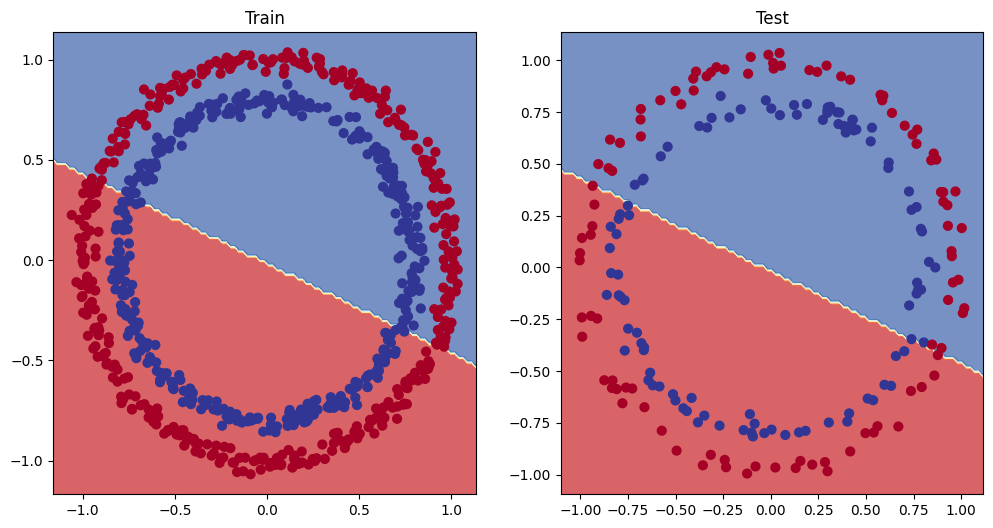

In [29]:
# Let's visualize the result
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_1,X_train,y_train)

plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_1,X_test,y_test)

# Non-linearity
We've seen our model can draw straight (linear) lines, thanks to its linear layers. But how about we give it the capacity to draw non-straight (non-linear) lines

## 1. Recreating non-linear data

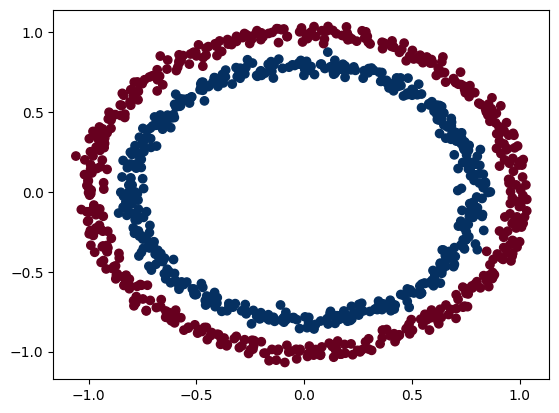

In [30]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import  make_circles

n_samples = 1000
X,y = make_circles(n_samples=n_samples,noise=0.03,random_state=random_seed)
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdBu)

In [31]:
# Convert data to tensors and then create train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data to tensor
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=random_seed)
print(f'First 5 sample of train data: X_train = {X_train[:5]}\ny_train= {y_train[:5]}')

First 5 sample of train data: X_train = tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994]])
y_train= tensor([1., 0., 0., 0., 1.])


## 2. Build a model with non-linearity

In [41]:
# Build a model with non-linearity
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        # Intersperse the ReLU activation function between layers
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    
model_2 = CircleModelV2()
model_2.to(device)
model_2

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

## 3. Training a model with non-linearity

In [47]:
# Setup loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [48]:
# Setup random seed
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)

print(device)

# Move data to target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

cuda


In [49]:
# Setup train loop
epochs = 1000
for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_logits = model_2(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    # 2. Calculate loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train,y_pred)
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    # 4. Loss backward
    loss.backward()
    # 5. Optimizer step
    optimizer.step()
    
    ### Testing
    model_2.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_2(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Calculate the loss
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_pred)
    
    # Print out
    if epoch % 50 == 0:
        print(f'Epoch {epoch}: Loss: {loss:.5f}\tAcc: {acc:.2f}%\tTest loss: {test_loss:.5f}\tTest acc: {test_acc:.2f}% ')

Epoch 0: Loss: 0.69115	Acc: 52.88%	Test loss: 0.69102	Test acc: 52.50% 
Epoch 50: Loss: 0.69050	Acc: 52.88%	Test loss: 0.69026	Test acc: 55.00% 
Epoch 100: Loss: 0.68977	Acc: 53.37%	Test loss: 0.68939	Test acc: 55.00% 
Epoch 150: Loss: 0.68893	Acc: 53.50%	Test loss: 0.68839	Test acc: 56.00% 
Epoch 200: Loss: 0.68794	Acc: 53.00%	Test loss: 0.68722	Test acc: 56.00% 
Epoch 250: Loss: 0.68675	Acc: 52.62%	Test loss: 0.68586	Test acc: 56.50% 
Epoch 300: Loss: 0.68516	Acc: 52.75%	Test loss: 0.68410	Test acc: 56.50% 
Epoch 350: Loss: 0.68325	Acc: 52.75%	Test loss: 0.68197	Test acc: 56.00% 
Epoch 400: Loss: 0.68101	Acc: 52.75%	Test loss: 0.67939	Test acc: 56.50% 
Epoch 450: Loss: 0.67835	Acc: 53.37%	Test loss: 0.67639	Test acc: 56.00% 
Epoch 500: Loss: 0.67513	Acc: 54.50%	Test loss: 0.67282	Test acc: 56.00% 
Epoch 550: Loss: 0.67130	Acc: 56.12%	Test loss: 0.66849	Test acc: 57.00% 
Epoch 600: Loss: 0.66655	Acc: 58.38%	Test loss: 0.66317	Test acc: 59.00% 
Epoch 650: Loss: 0.65983	Acc: 61.12%	Test

## 4. Evaluating model

In [52]:
model_2.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_2(X_test))).squeeze()
print(f'First 5 predictions: {y_preds[:5]}\nFirst 5 actual data: {y_test[:5]}')

First 5 predictions: tensor([1., 1., 1., 0., 1.], device='cuda:0')
First 5 actual data: tensor([1., 0., 1., 0., 1.], device='cuda:0')


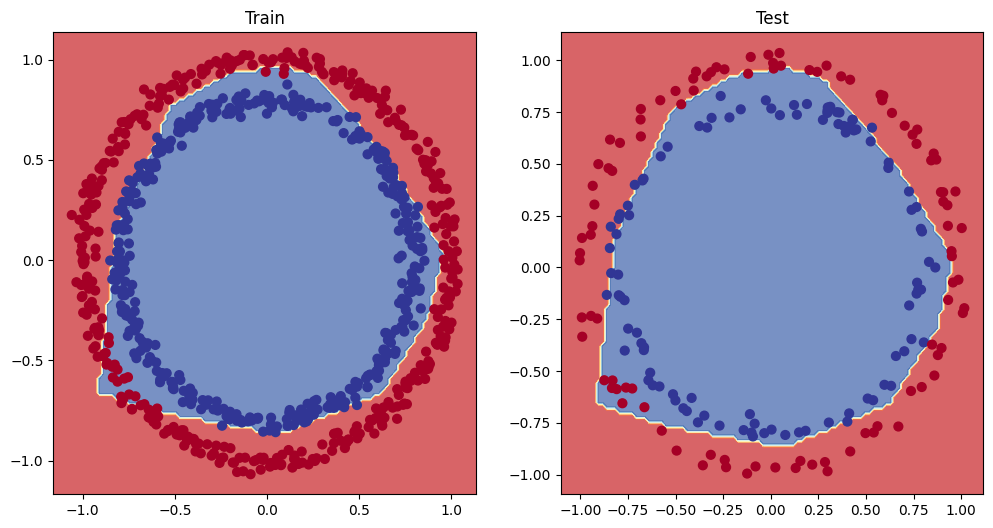

In [53]:
# plot decision boundaries for training and testing set
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_2,X_train,y_train)

plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_2,X_test,y_test)